# GRIP_TASK_3: EXPLORATORY DATA ANALYSIS - RETAIL

### NAME : RAMA S

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/SampleSuperstore.csv")

In [ ]:
dataset.info

<bound method DataFrame.info of            Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994 r

In [ ]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
dataset.shape

(9994, 13)

#analyse in three level
1. product level,
2. customer level
3. order level

In [ ]:
dataset['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
#number of Sub-categories products are divided.
dataset['Sub-Category'].nunique()

17

In [ ]:
#number of products in each sub-category
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

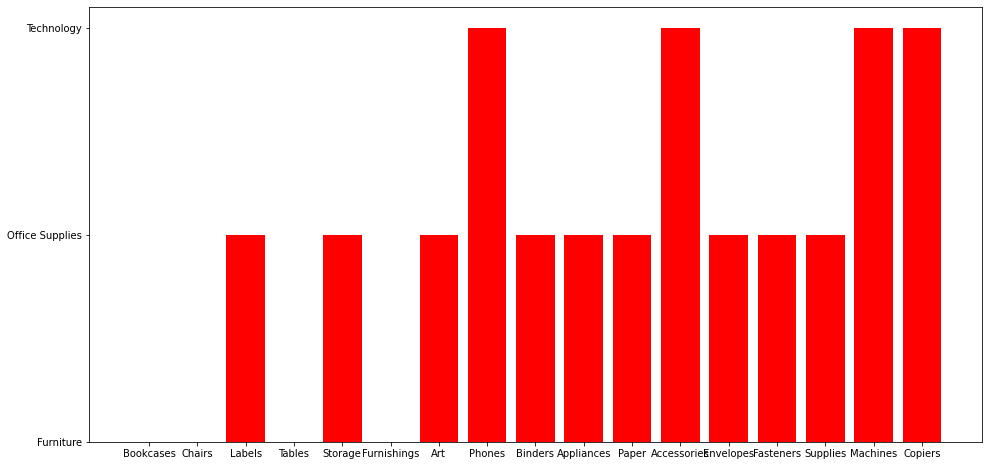

In [ ]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=dataset,color='red')
plt.show()

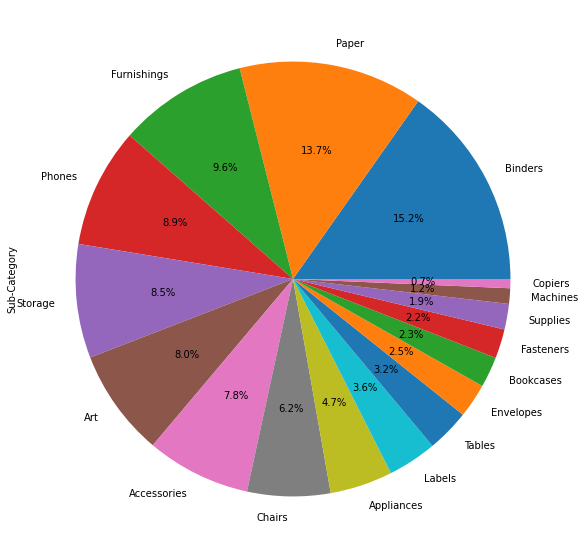

In [ ]:
plt.figure(figsize=(12,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


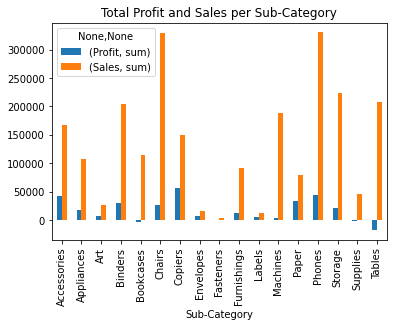

In [ ]:
dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


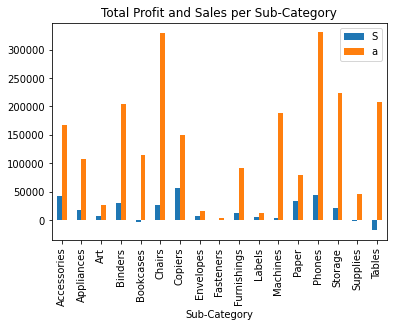

In [ ]:
dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.legend('Profit')
plt.legend('Sales')
plt.show()

In [ ]:
dataset['Cost']=dataset['Sales']-dataset['Profit']
dataset['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [ ]:
dataset['Profit %']=(dataset['Profit']/dataset['Cost'])*100

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


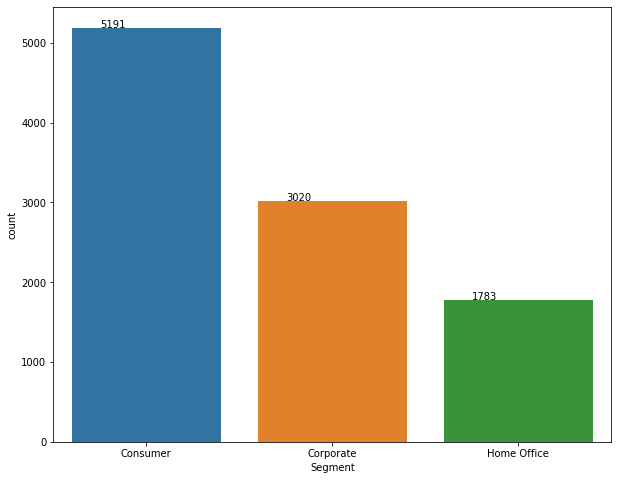

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = dataset)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

In [ ]:
group_by_ship_mode = dataset.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
group_by_ship_mode

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


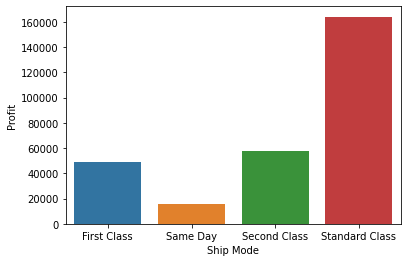

In [ ]:
# calculating ship mode and profit
import seaborn as sns
sns.barplot(x = 'Ship Mode', y = 'Profit', data = group_by_ship_mode)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

In [ ]:
group_by_category = dataset.groupby(['Category'], as_index = False)['Profit'].sum()
group_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


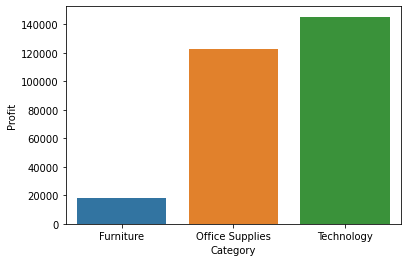

In [ ]:
sns.barplot(x = 'Category', y = 'Profit', data = group_by_category) 

In [ ]:
group_by_sub_category = dataset.groupby(['Sub-Category'], as_index = False)['Profit'].sum()
group_by_sub_category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

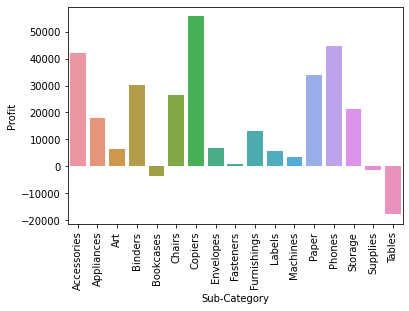

In [ ]:
sns.barplot(y = 'Profit', x = 'Sub-Category', data = group_by_sub_category) 
plt.xticks(rotation=90)

In [ ]:
group_by_region = dataset.groupby(['Region'], as_index = False)['Profit'].sum()

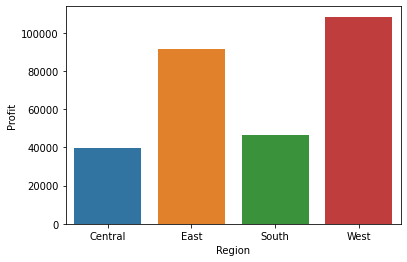

In [ ]:
# visualize the region wise profit
sns.barplot(y = 'Profit', x = 'Region', data = group_by_region) 

In [ ]:
group_by_state=dataset.groupby(['State'],as_index=False)['Profit'].sum()
group_by_state.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


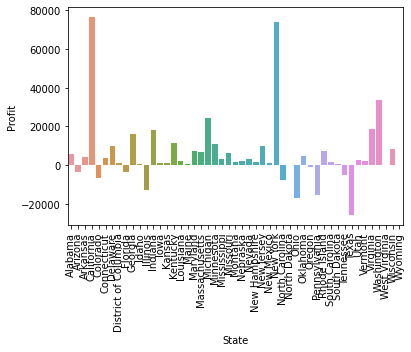

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.barplot(y = 'Profit', x = 'State', data = group_by_state) 
plt.xticks(rotation=90)
plt.figure(figsize=[20, 10])
plt.show()

In [ ]:
group_by_segment=dataset.groupby(['Segment'],as_index=False).sum()
group_by_segment.head()

,Segment,Postal Code,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092,1.027282e+06,163890.089336
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340,6.141672e+05,97413.627026
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785,3.693545e+05,62285.852491


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

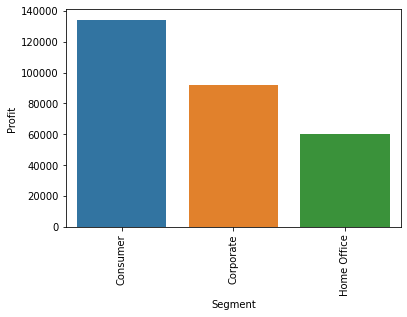

In [ ]:
sns.barplot(y = 'Profit', x = 'Segment', data = group_by_segment) 
plt.xticks(rotation=90)

In [ ]:
group_by_city = dataset.groupby(['City'], as_index = False)['Profit'].sum()
group_by_city

,City,Profit
0,Aberdeen,6.6300
1,Abilene,-3.7584
2,Akron,-186.6356
3,Albuquerque,634.0881
4,Alexandria,318.6183
...,...,...
526,Woonsocket,78.6791
527,Yonkers,2767.7557
528,York,-102.1692
529,Yucaipa,13.2080


In [ ]:
pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (9994, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    12 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################


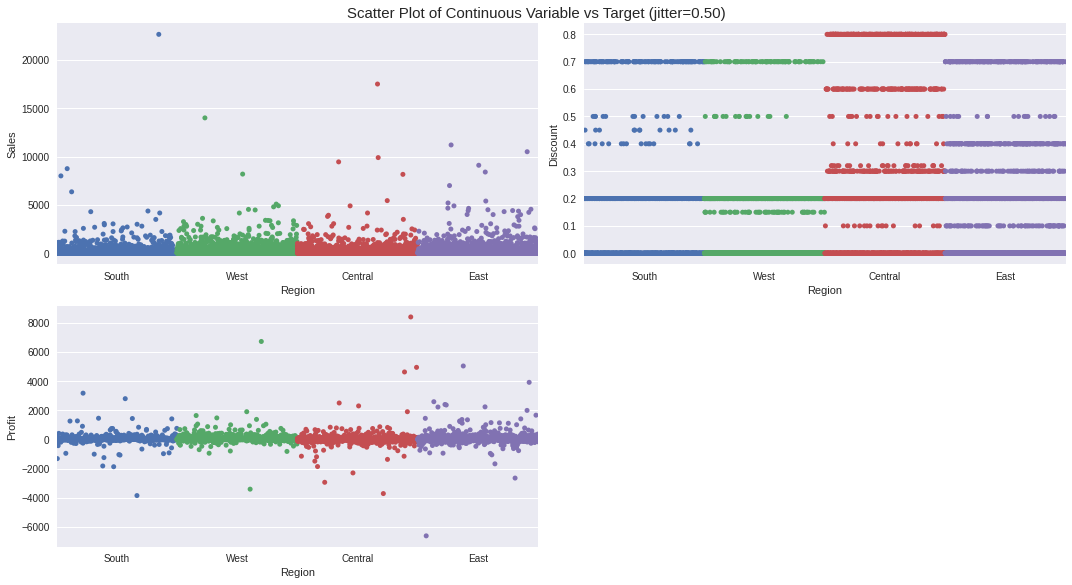

Total Number of Scatter Plots = 6


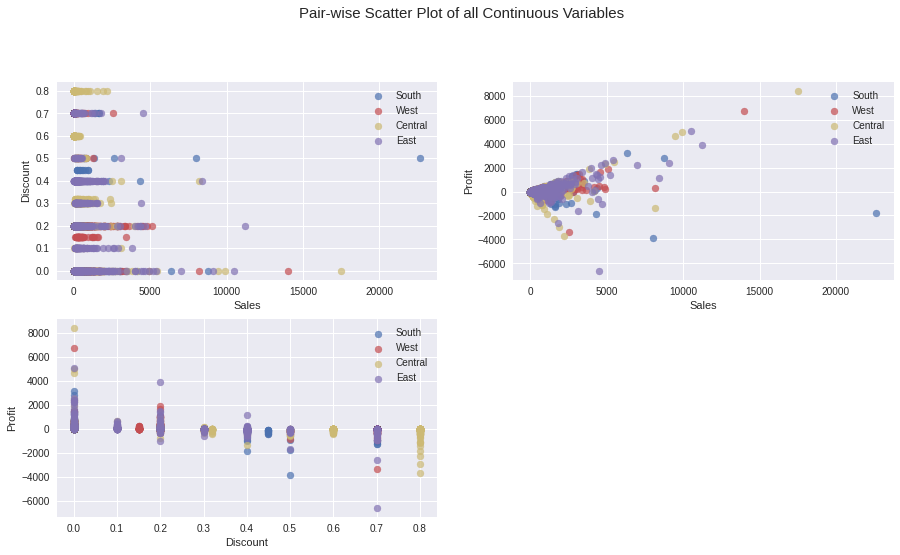

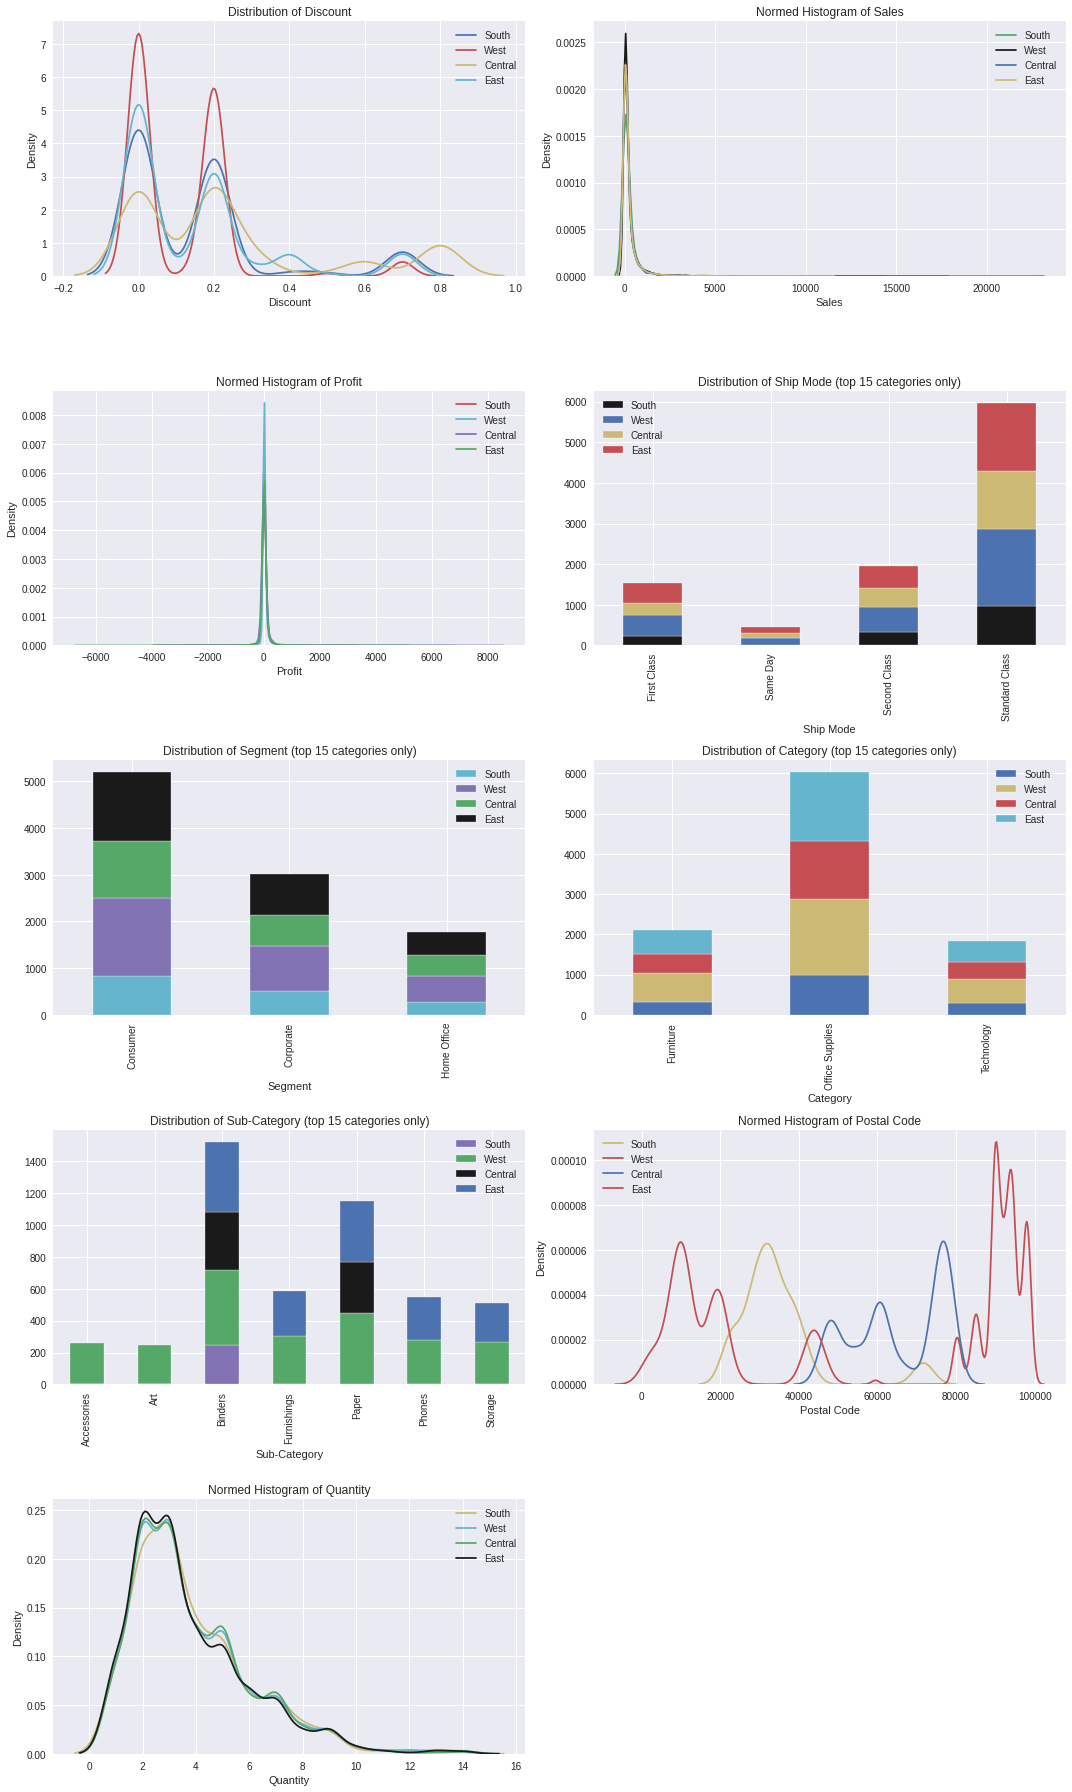

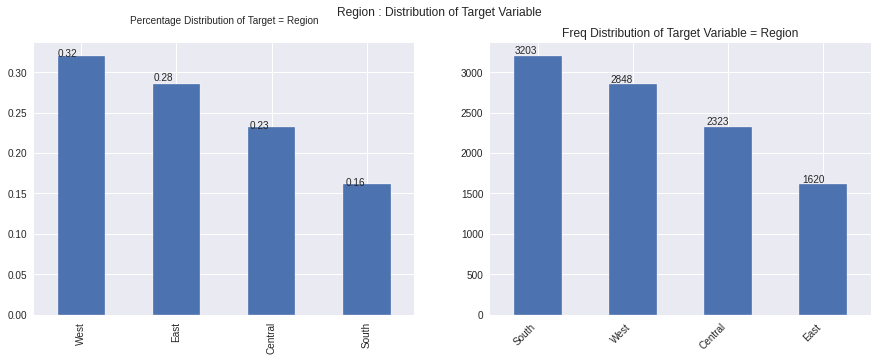

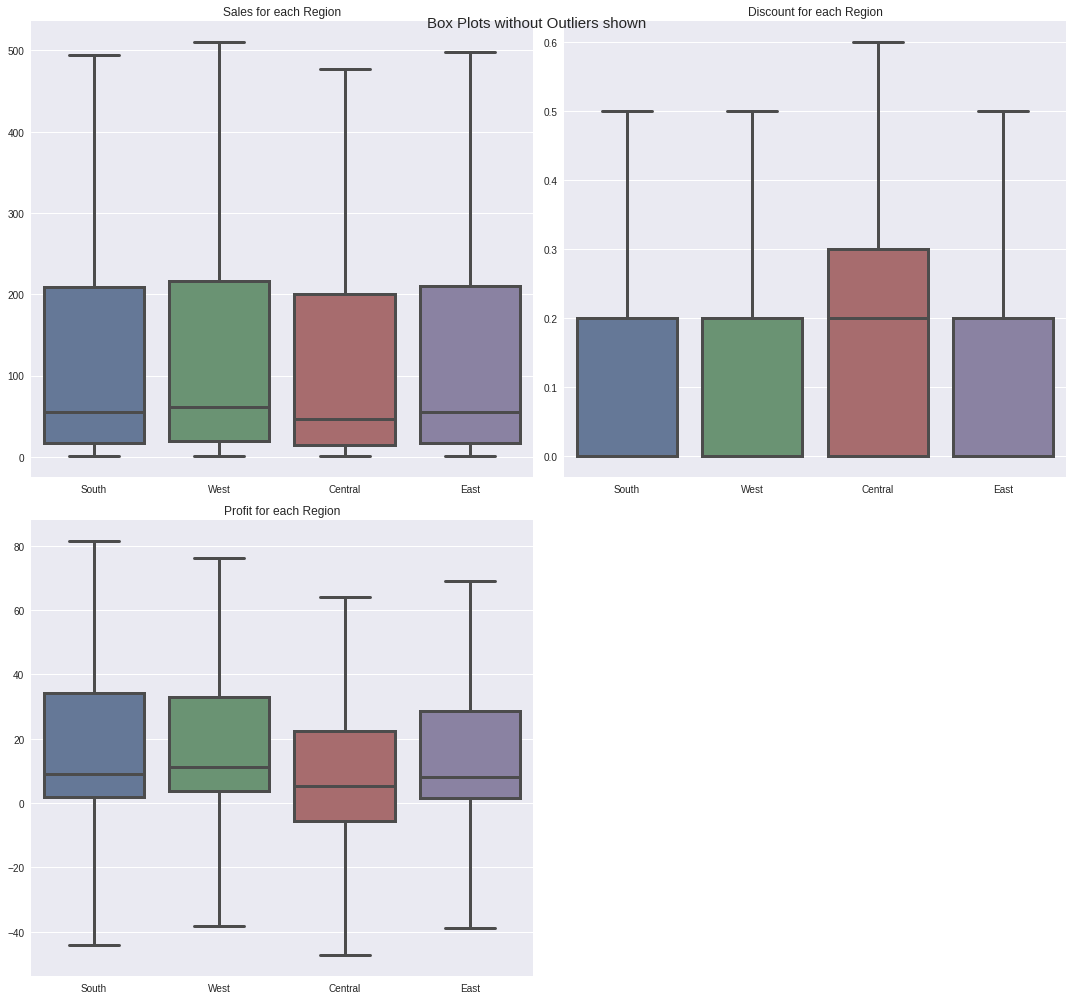

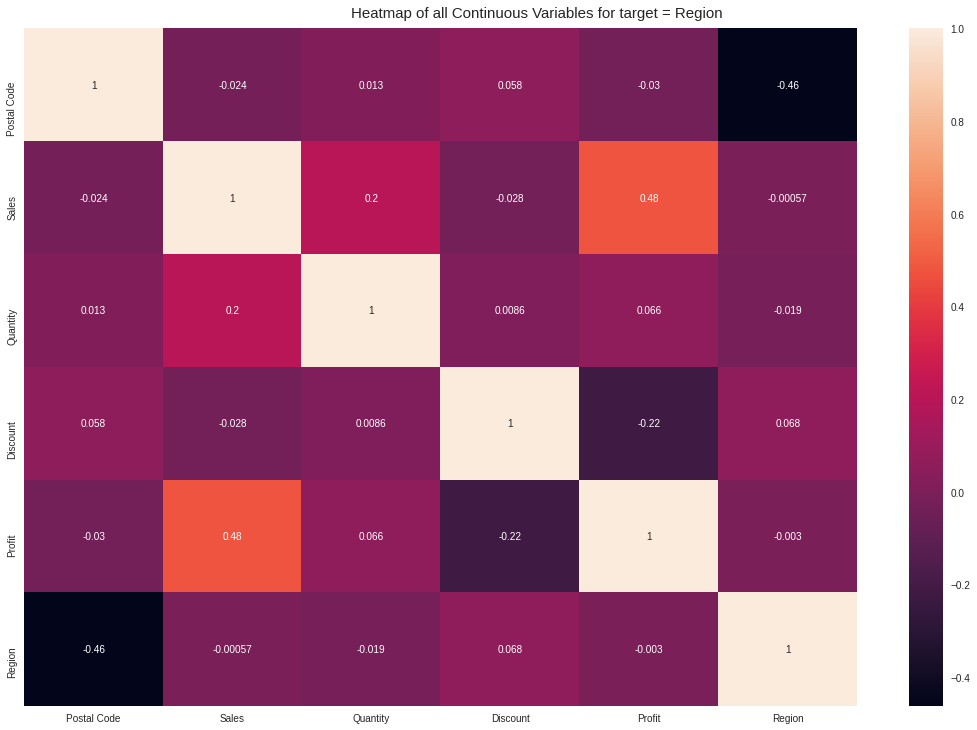

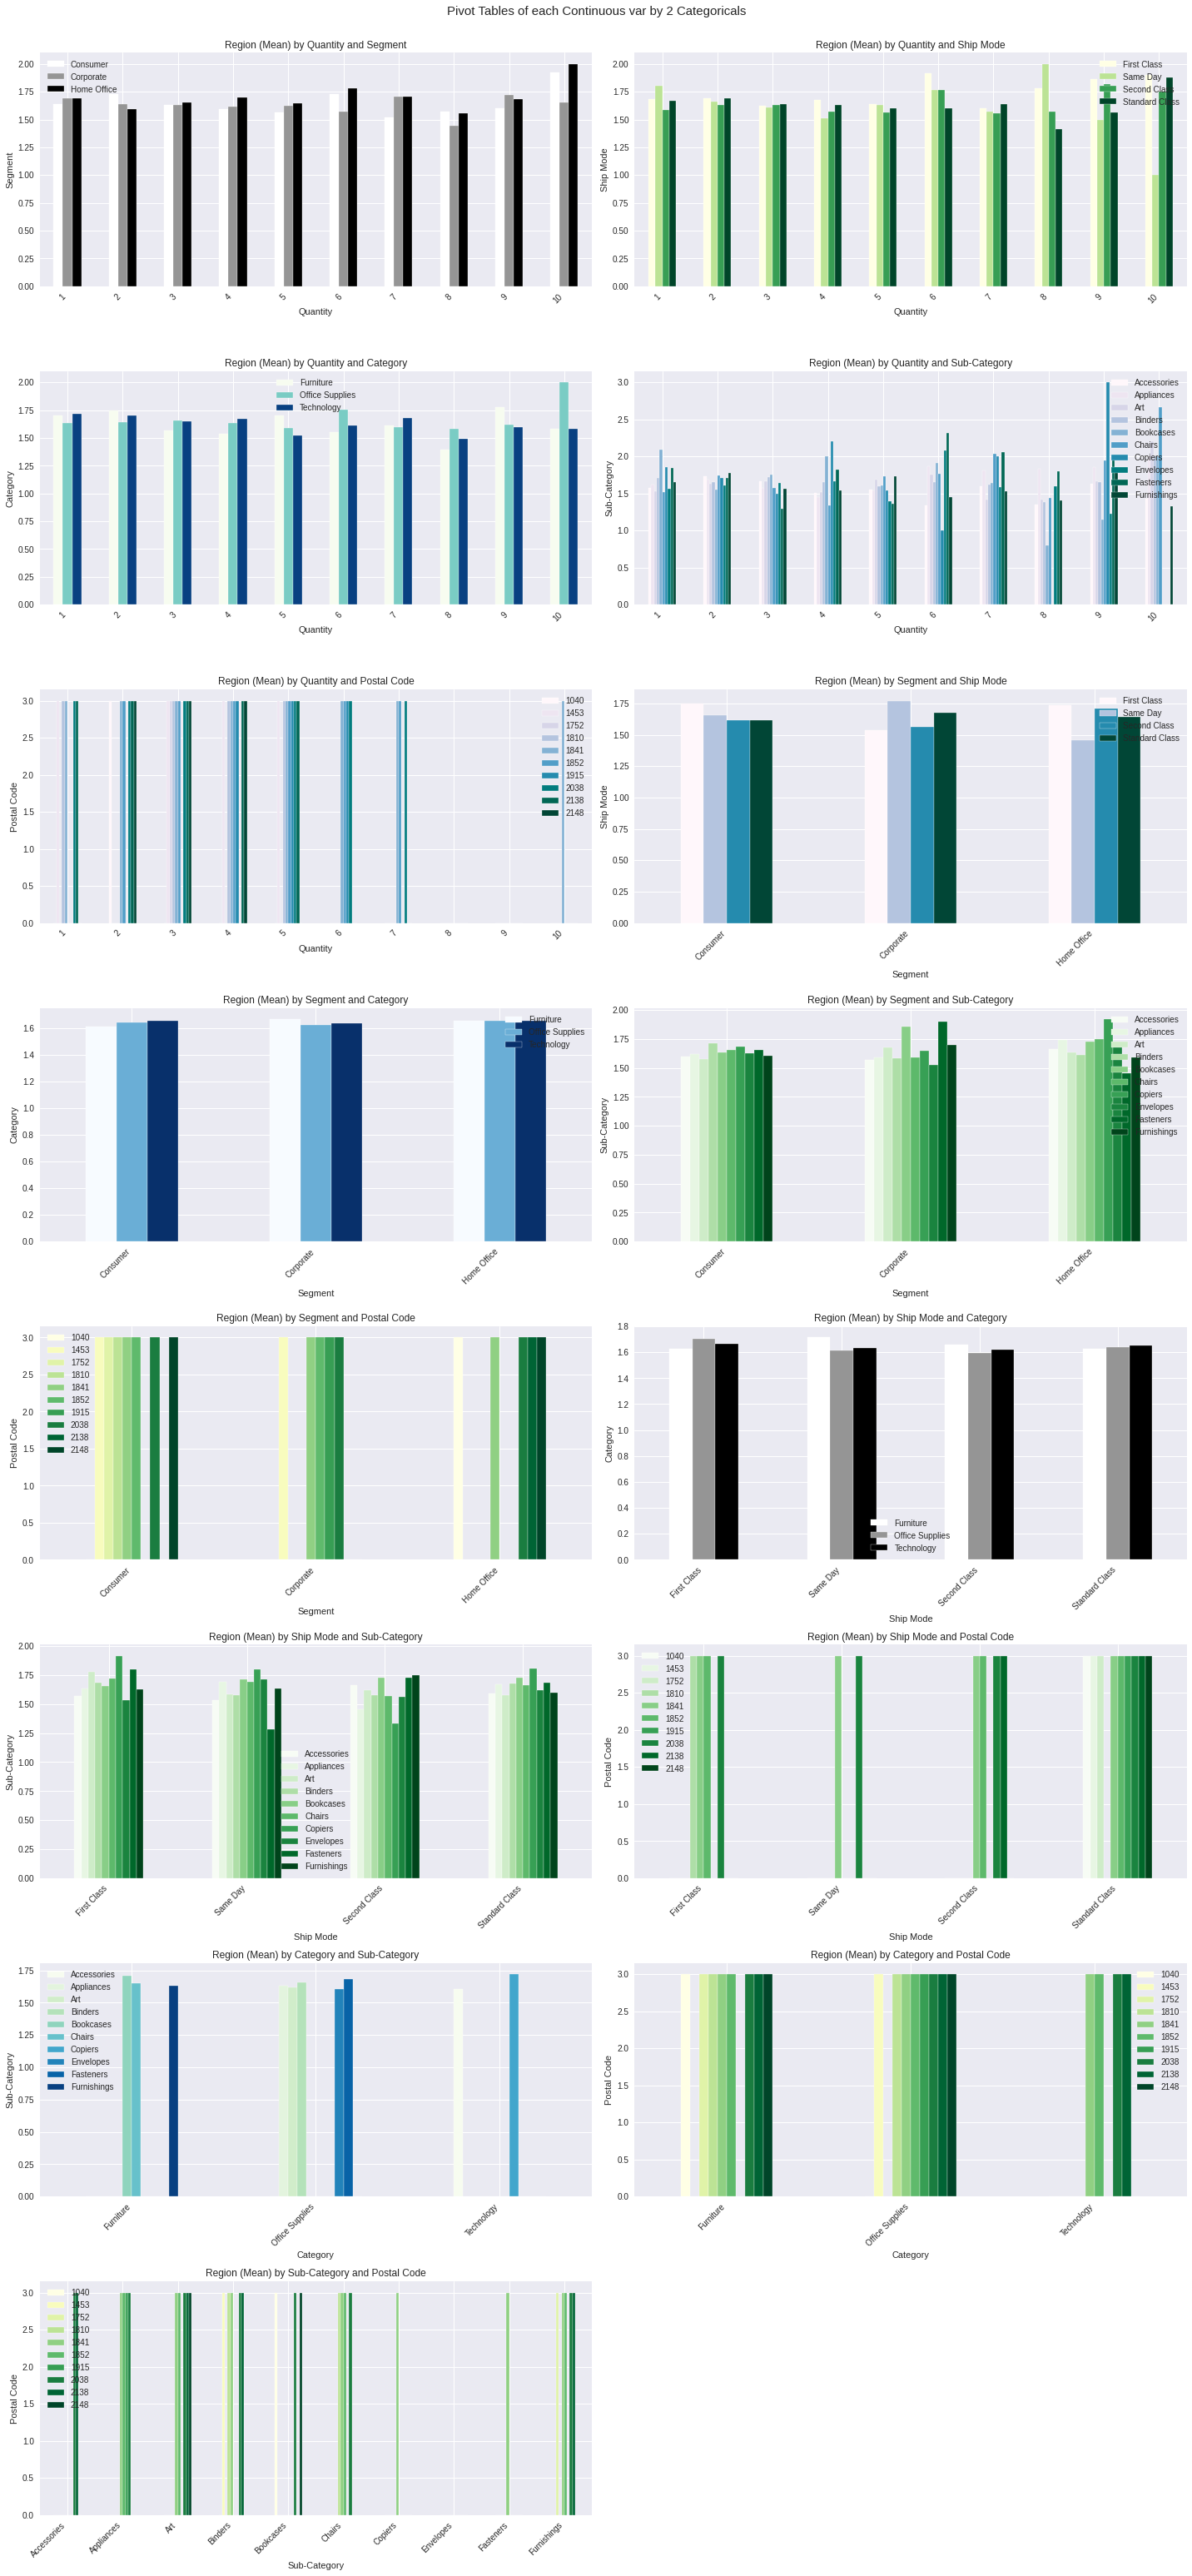

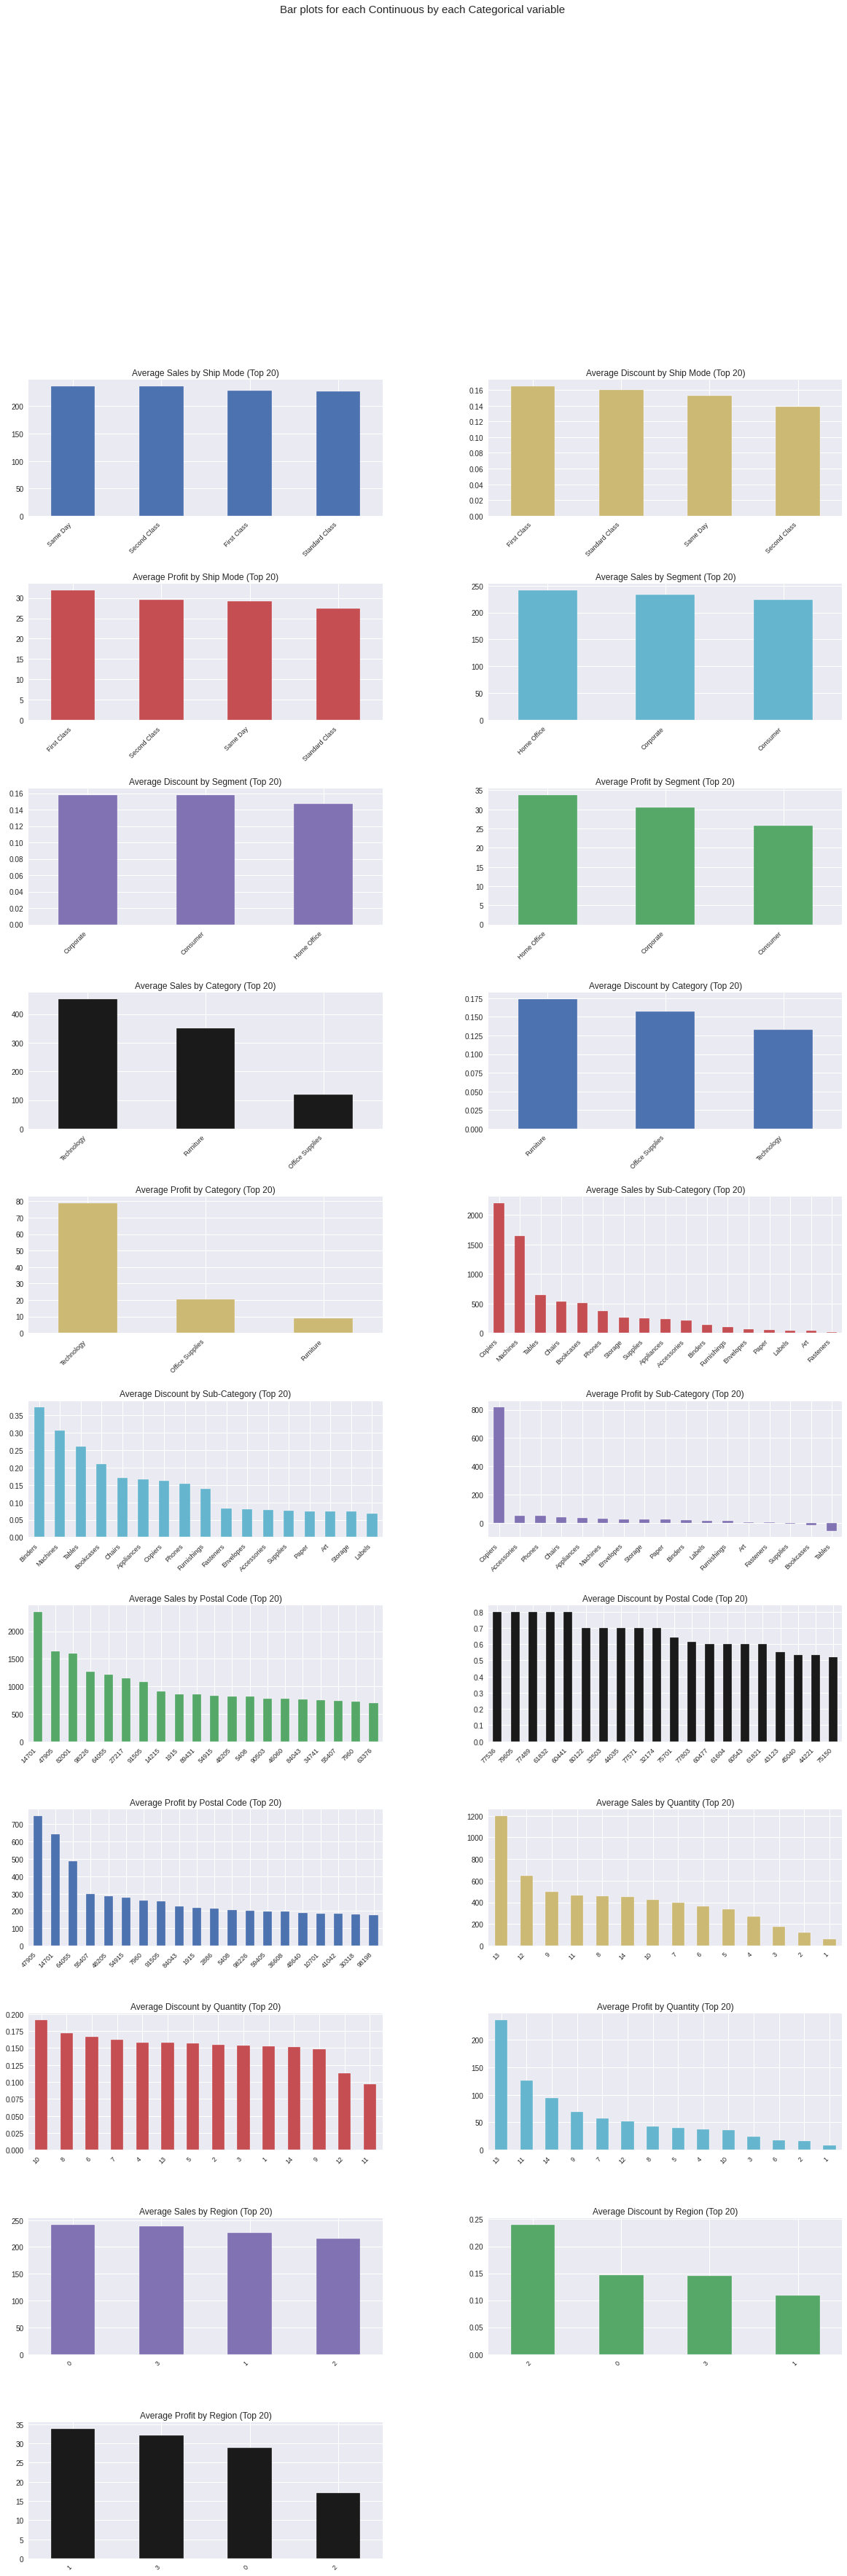

Time to run AutoViz (in seconds) = 19.430

 ###################### VISUALIZATION Completed ########################


In [ ]:
dataset = AV.AutoViz('SampleSuperstore.csv',depVar='Region')

*Center** region is profit low.


**West virginia, wyoming and North dakota **is low profit


In state wise **Texas** state is very loss